In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [106]:
def trap(x,a,b,c,d):
    return max( min((x-a)/(b-a),1,(x-d)/(c-d)) , 0)


In [107]:
X1 = np.linspace(0,25,1000)


In [108]:
uA = []
uB = []

for x in  X1:
    uA.append( trap(x,3,8,12,17))
    uB.append( trap(x,5,10,18,22))

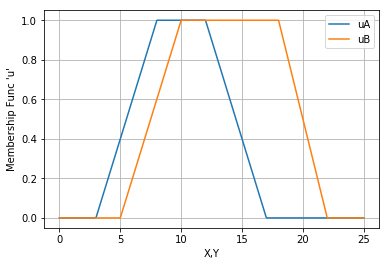

In [109]:
plt.plot(X1,uA , label = 'uA')
plt.plot(X1,uB, label = 'uB')
plt.xlabel('X,Y')
plt.ylabel("Membership Func 'u'")
plt.legend()
plt.grid()

In [110]:
class Tnorm:
    
    def __init__(self):
        
        pass
    
    def minimum(self,a,b):
        c =  [ min(a[i] , b[j]) for i in range(len(a)) for j in range(len(b))]
        return np.array(c).reshape(len(a),len(a))
    
    def algebraic_prod(self,a,b):
        return np.matmul(np.array([a]).T,np.array([b]))
    
    def bound_prod(self,a,b):
        c = [ max(0 , a[i] + b[j] -1) for i in range(len(a)) for j in range(len(b))]
        return np.array(c).reshape(len(a),len(a))
    
    def drastic_prod(self,a,b):
        
        p = []
        
        for i in range(len(a)):
            for j in range(len(b)):
                
                if ( max(a[i],b[j]) == 1):
                    p.append( min(a[i],b[j]))
                                
                else:
                    p.append(0)
       
        return np.array(p).reshape(len(a),len(a))
        
    
    pass


In [111]:
class Snorm:
    
    def __init__(self):
        
        pass
    
    def maximum(self,a,b):
        c =  [ max(a[i] , b[j]) for i in range(len(a)) for j in range(len(b))]
        return np.array(c).reshape(len(a),len(a))
    
    def algebraic_sum(self,a,b):
        c =  [ a[i] + b[j] - (a[i] * b[j]) for i in range(len(a)) for j in range(len(b))]
        return np.array(c).reshape(len(a),len(a))
    
    def bound_sum(self,a,b):
        c = [ min(1 , a[i] + b[j]) for i in range(len(a)) for j in range(len(b))]
        return np.array(c).reshape(len(a),len(a))
    
    def drastic_sum(self,a,b):
        
        p = []
        
        for i in range(len(a)):
            for j in range(len(b)):
                
                if ( min(a[i],b[j]) == 0):
                    p.append( max(a[i],b[j]))
                
                else:
                    p.append(1)
                
        return np.array(p).reshape(len(a),len(a))

# Question: 1

In [112]:
T = Tnorm()
S = Snorm()

X , Y = np.meshgrid(X1,X1)

In [113]:
def plot3D(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,  linewidth=0, antialiased=False)
    # ax.text(20,-15,0,'X')
    # ax.text(35,10,0,'Y')
    # ax.text(32,30,0.5,'Min')
    plt.show()
    

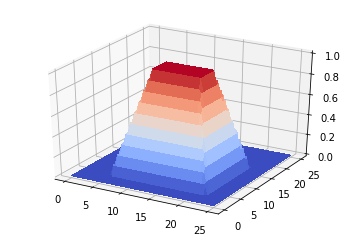

In [114]:
# Minimum
Z = T.minimum(uA,uB)

plot3D(X,Y,Z)

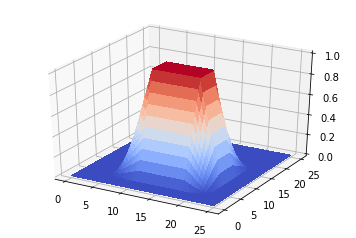

In [115]:
# algebraic product
Z = T.algebraic_prod(uA,uB)

plot3D(X,Y,Z)

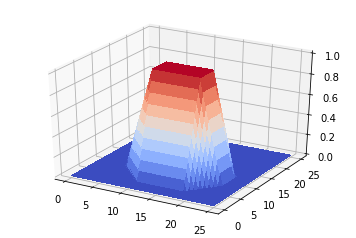

In [116]:
# bound product
Z = T.bound_prod(uA,uB)

plot3D(X,Y,Z)

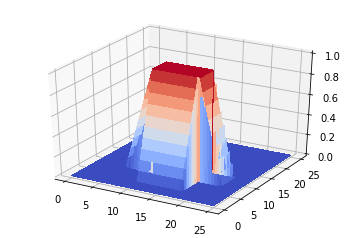

In [117]:
# drastic product
Z = T.drastic_prod(uA,uB)

plot3D(X,Y,Z)

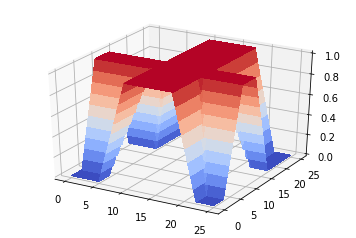

In [118]:
# maximum
Z = S.maximum(uA,uB)

plot3D(X,Y,Z)

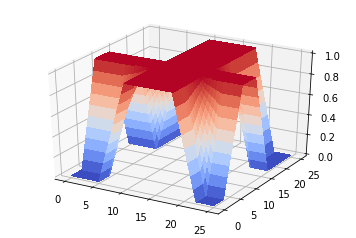

In [119]:
#algebraic_sum
Z = S.algebraic_sum(uA,uB)

plot3D(X,Y,Z)

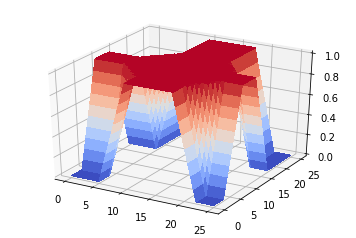

In [120]:
#bound_sum
Z = S.bound_sum(uA,uB)

plot3D(X,Y,Z)

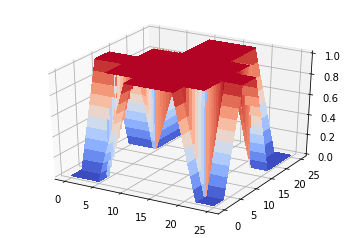

In [121]:
#drastic_sum
Z = S.drastic_sum(uA,uB)

plot3D(X,Y,Z)

# Question : 2

In [122]:
# uA , uB are available
# Create uAprime 
uAprime = []

for x in  X1:
    uAprime.append( trap(x,12,15,17,19))

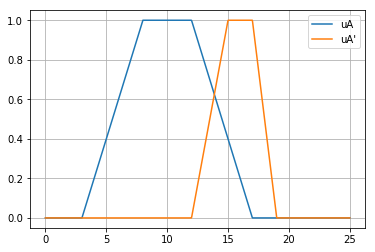

In [123]:
plt.plot(X1,uA , label = 'uA')
plt.plot(X1,uAprime , label = "uA'")
plt.legend()
plt.grid()

In [124]:
# Find uBprime

# Firing Strength
k = [min(uA[i], uAprime[i]) for i in range(len(uA))]
w = max(k)

uBprime = [min(w,uB[i]) for i in range(len(uB))]

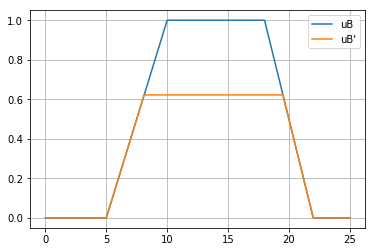

In [125]:
plt.plot(X1,uB , label = 'uB')
plt.plot(X1,uBprime , label = "uB'")
plt.legend()
plt.grid()

# Question : 3

In [126]:
# uA , uAprime , uB , uBprime , w are available
uC , uCprime = [] , []

for x in X1:
    uC.append( trap(x,7,15,21,24))

In [127]:
w1 = w

In [128]:
k = [min(uB[i], uBprime[i]) for i in range(len(uB))]
w2 = max(k)

In [129]:
uCprime = [min(w1,w2,uC[i]) for i in range(len(uB))]

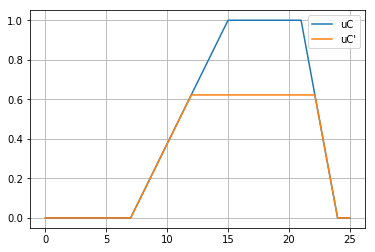

In [130]:
plt.plot(X1,uC , label = 'uC')
plt.plot(X1,uCprime , label = "uC'")
plt.legend()
plt.grid()